<a href="https://colab.research.google.com/github/ShivamSingh8853/Face-Mask-Detection-Jupyter-Notebook/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
from PIL import Image 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])

['with_mask_254.jpg', 'with_mask_948.jpg', 'with_mask_723.jpg', 'with_mask_3470.jpg', 'with_mask_475.jpg']


In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])

['without_mask_3604.jpg', 'without_mask_3712.jpg', 'without_mask_2942.jpg', 'without_mask_3237.jpg', 'without_mask_848.jpg']


In [10]:
print('Number of  images with mask',len(with_mask_files))
print('Number of images without mask',len(without_mask_files))

Number of  images with mask 3725
Number of images without mask 3828


Creating Labels for the two class  of images


With_mask = 1
without_mask = 0 

In [11]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828


In [12]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [14]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


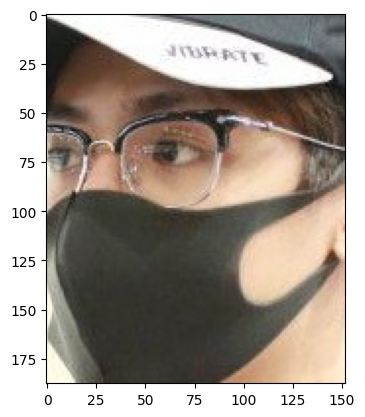

In [15]:
img = mpimg.imread('/content/data/with_mask/with_mask_254.jpg')
imgplot = plt.imshow(img)
plt.show()

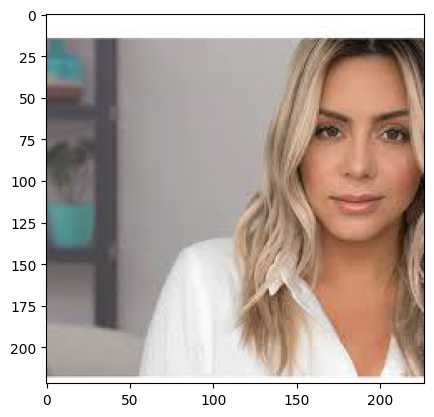

In [16]:
img = mpimg.imread('/content/data/without_mask/without_mask_3604.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1. Resizing the images
2. Convert the images to numpy array

In [17]:
with_mask_path = '/content/data/with_mask/'

data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
type(data)

list

In [19]:
len(data)

7553

In [20]:
data[0]

array([[[251, 250, 248],
        [255, 255, 254],
        [255, 255, 253],
        ...,
        [ 90,  95,  99],
        [ 85,  90,  94],
        [ 84,  89,  93]],

       [[156, 155, 153],
        [187, 187, 185],
        [221, 221, 219],
        ...,
        [ 98, 103, 107],
        [ 92,  97, 101],
        [ 98, 103, 107]],

       [[ 46,  46,  44],
        [ 54,  54,  52],
        [ 82,  82,  80],
        ...,
        [104, 109, 113],
        [101, 106, 110],
        [106, 111, 115]],

       ...,

       [[253, 253, 229],
        [253, 253, 230],
        [254, 253, 233],
        ...,
        [252, 236, 208],
        [252, 238, 209],
        [254, 240, 211]],

       [[253, 253, 229],
        [252, 252, 229],
        [254, 253, 231],
        ...,
        [252, 236, 207],
        [252, 238, 209],
        [253, 239, 210]],

       [[253, 253, 229],
        [253, 253, 229],
        [253, 253, 230],
        ...,
        [253, 237, 206],
        [251, 237, 208],
        [252, 238, 209]]

In [21]:
type(data[0])

numpy.ndarray

In [22]:
data[0].shape

(128, 128, 3)

In [23]:
x= np.array(data)
y= np.array(labels)

In [24]:
type(x)

numpy.ndarray

In [25]:
type(y)

numpy.ndarray

In [26]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [27]:
print(y)

[1 1 1 ... 0 0 0]


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [29]:
print(x.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


Scaling the data

In [30]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [31]:
x_train_scaled[1]

array([[[0.18039216, 0.17647059, 0.19215686],
        [0.18431373, 0.18431373, 0.19215686],
        [0.19607843, 0.18039216, 0.18823529],
        ...,
        [0.27058824, 0.27843137, 0.26666667],
        [0.26666667, 0.2745098 , 0.2627451 ],
        [0.26666667, 0.2627451 , 0.2627451 ]],

       [[0.18039216, 0.18039216, 0.18823529],
        [0.18039216, 0.18039216, 0.18823529],
        [0.19215686, 0.18039216, 0.18431373],
        ...,
        [0.2745098 , 0.2745098 , 0.26666667],
        [0.26666667, 0.2745098 , 0.2627451 ],
        [0.25490196, 0.25490196, 0.25098039]],

       [[0.17647059, 0.17647059, 0.18431373],
        [0.17647059, 0.17647059, 0.18039216],
        [0.18823529, 0.17254902, 0.17647059],
        ...,
        [0.27843137, 0.27843137, 0.26666667],
        [0.2627451 , 0.26666667, 0.25490196],
        [0.24313725, 0.23921569, 0.23529412]],

       ...,

       [[0.44313725, 0.4627451 , 0.44705882],
        [0.45490196, 0.4745098 , 0.45882353],
        [0.4627451 , 0

Building the Convolutional Neural Network

In [32]:
import tensorflow  as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [34]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 16s 22ms/step - loss: 0.4674 - acc: 0.8017 - val_loss: 0.3325 - val_acc: 0.8661
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2926 - acc: 0.8838 - val_loss: 0.2706 - val_acc: 0.8826
Epoch 3/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2250 - acc: 0.9056 - val_loss: 0.2918 - val_acc: 0.8843
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1947 - acc: 0.9233 - val_loss: 0.2511 - val_acc: 0.9008
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1723 - acc: 0.9332 - val_loss: 0.2434 - val_acc: 0.9058


Model Evaluation

In [36]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 10ms/step - loss: 0.2432 - acc: 0.9107
Test Accuracy = 0.9106552004814148


In [37]:
h = history

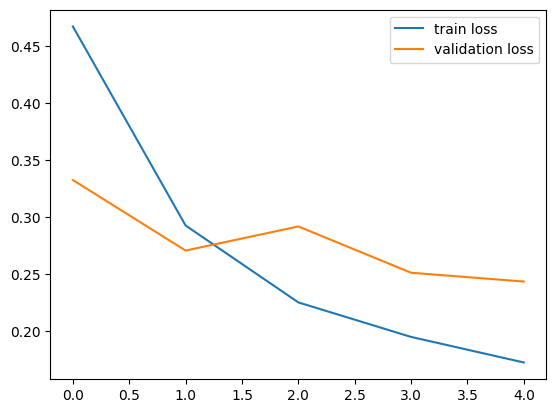

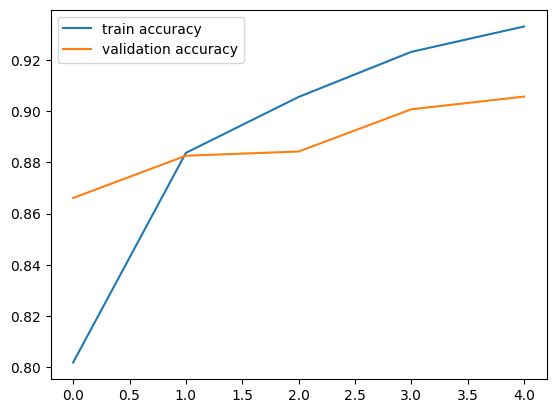

In [38]:
# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: /content/istockphoto-1272058180-612x612.jpg


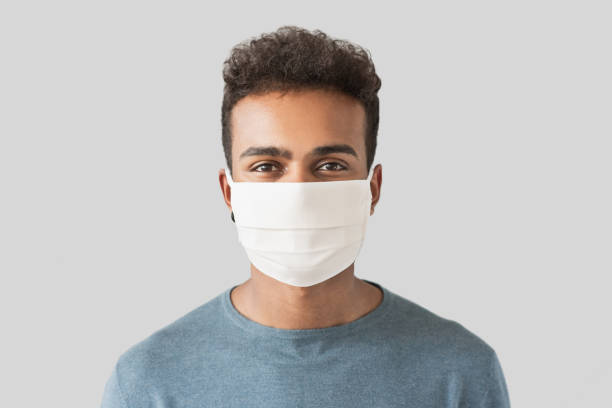

1/1 [==============================] - 0s 186ms/step
[[0.27753425 0.687518  ]]
1
The person in the image is wearing a mask


In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')